In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# project name: forest type mapping
# alogorithm used: logistic regression
# we need to predict class
#  steps we followed:
# 1.reading file
# 2.visualization dataset using graphs
# 3.checking for null values and droping them if any present in the dataset
# 4.checking for categorical columns dtype object present or not,if present labeling with label encounter
# 5.initializing variables y,x such that y is the thing which we need to predict(dependent) and x is the data which is independed
# 6.confusion matrix
# 7.accuracy check
# 8.other type of validation

# personal info:
# team: DARK
# project id:21 
# team members:

# name:                               reg_no:
# Seelam Nagarjuna Reddy              40111161
# Shaik sharif                        40111172
# Shaik Amzad Patel                   40111164

In [6]:
#reading our dataset
df=pd.read_csv("training.csv")

In [7]:
df.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [8]:
# d=mixed deciduous forest
# h= hinoki forest
# o=other
# s=sugi forest
#knowing structure of our dataset
df.shape

(198, 28)

Text(0, 0.5, 'b8')

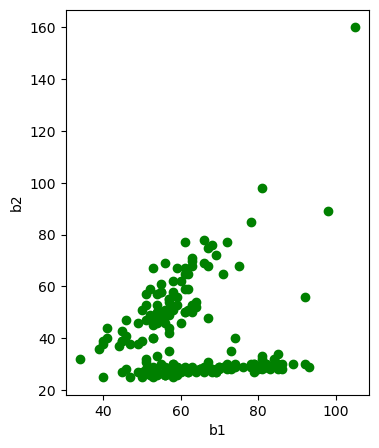

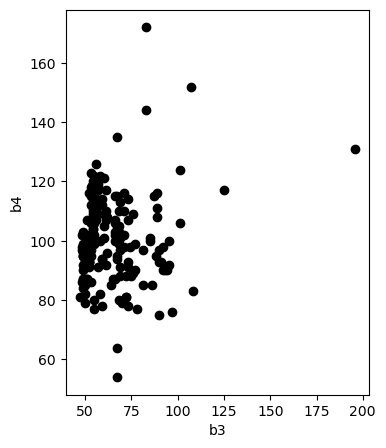

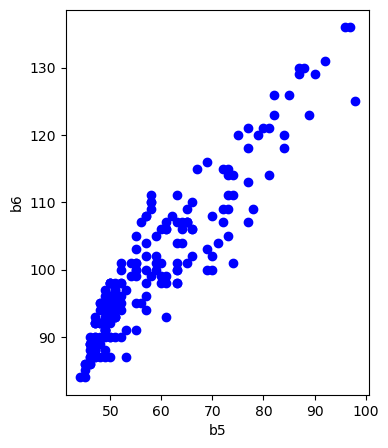

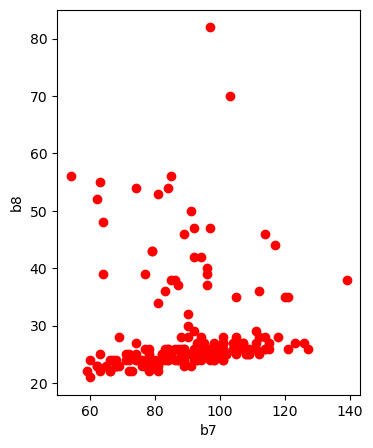

In [9]:
#visualizing data to find the relation between dependent and independent values
plt.figure(figsize=(18,5))
plt.subplot(1,4,1)
plt.plot(df.b1,df.b2,'go')
plt.xlabel('b1')
plt.ylabel('b2')
plt.figure(figsize=(18,5))
plt.subplot(1,4,2)
plt.plot(df.b3,df.b4,'ko')
plt.xlabel('b3')
plt.ylabel('b4')
plt.figure(figsize=(18,5))
plt.subplot(1,4,3)
plt.plot(df.b5,df.b6,'bo')
plt.xlabel('b5')
plt.ylabel('b6')

plt.figure(figsize=(18,5))
plt.subplot(1,4,4)
plt.plot(df.b7,df.b8,'ro')
plt.xlabel('b7')
plt.ylabel('b8')


<AxesSubplot:xlabel='class', ylabel='count'>

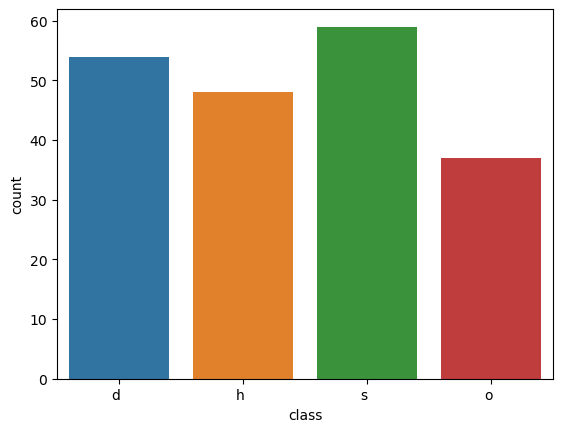

In [10]:
sns.countplot(x='class',data=df)

In [11]:
#searching for null values
df.isnull()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
194,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                198 non-null    object 
 1   b1                   198 non-null    int64  
 2   b2                   198 non-null    int64  
 3   b3                   198 non-null    int64  
 4   b4                   198 non-null    int64  
 5   b5                   198 non-null    int64  
 6   b6                   198 non-null    int64  
 7   b7                   198 non-null    int64  
 8   b8                   198 non-null    int64  
 9   b9                   198 non-null    int64  
 10  pred_minus_obs_H_b1  198 non-null    float64
 11  pred_minus_obs_H_b2  198 non-null    float64
 12  pred_minus_obs_H_b3  198 non-null    float64
 13  pred_minus_obs_H_b4  198 non-null    float64
 14  pred_minus_obs_H_b5  198 non-null    float64
 15  pred_minus_obs_H_b6  198 non-null    flo

In [13]:
#there are no null values
#now searching for categorical (dtype=object) values
df.dtypes

class                   object
b1                       int64
b2                       int64
b3                       int64
b4                       int64
b5                       int64
b6                       int64
b7                       int64
b8                       int64
b9                       int64
pred_minus_obs_H_b1    float64
pred_minus_obs_H_b2    float64
pred_minus_obs_H_b3    float64
pred_minus_obs_H_b4    float64
pred_minus_obs_H_b5    float64
pred_minus_obs_H_b6    float64
pred_minus_obs_H_b7    float64
pred_minus_obs_H_b8    float64
pred_minus_obs_H_b9    float64
pred_minus_obs_S_b1    float64
pred_minus_obs_S_b2    float64
pred_minus_obs_S_b3    float64
pred_minus_obs_S_b4    float64
pred_minus_obs_S_b5    float64
pred_minus_obs_S_b6    float64
pred_minus_obs_S_b7    float64
pred_minus_obs_S_b8    float64
pred_minus_obs_S_b9    float64
dtype: object

In [14]:
"""we found class is object type and as class is the thing which i need to predict i cant remove
   so i did labelling to it with the use if labelencoder"""
l3 = LabelEncoder()
label = l3.fit_transform(df['class'])

In [15]:
label

array([0, 1, 3, 3, 0, 1, 3, 0, 3, 2, 0, 2, 2, 0, 3, 2, 2, 0, 3, 1, 2, 0,
       3, 1, 0, 1, 2, 0, 0, 0, 0, 3, 2, 3, 0, 0, 0, 1, 2, 0, 0, 0, 3, 3,
       1, 0, 0, 2, 0, 3, 0, 3, 3, 1, 1, 3, 2, 0, 1, 1, 0, 2, 2, 2, 1, 3,
       1, 0, 0, 1, 2, 2, 2, 3, 1, 3, 0, 2, 3, 3, 0, 0, 2, 1, 2, 1, 0, 0,
       3, 2, 2, 1, 2, 2, 0, 3, 2, 1, 2, 3, 0, 2, 1, 1, 1, 1, 1, 0, 3, 1,
       0, 0, 0, 0, 1, 2, 3, 1, 3, 3, 3, 3, 2, 3, 1, 3, 1, 3, 1, 0, 3, 3,
       2, 3, 1, 3, 2, 3, 0, 3, 3, 1, 3, 1, 3, 0, 0, 3, 1, 0, 3, 1, 3, 0,
       2, 0, 3, 2, 0, 3, 2, 0, 2, 3, 0, 1, 3, 3, 2, 0, 3, 1, 1, 1, 3, 3,
       1, 0, 1, 0, 3, 3, 1, 3, 1, 3, 0, 2, 1, 3, 3, 3, 1, 0, 0, 1, 1, 1])

In [16]:
l3.classes_

array(['d ', 'h ', 'o ', 's '], dtype=object)

In [18]:
# from above arry i  got the labels so

# d=0 , h=1 , o=2 ,s =3
# d=mixed deciduous forest
# h= hinoki forest
# o=other
# s=sugi forest

In [19]:
pf=df
# creating a dummy variable pf so that i can makes changes and perform tasks and my df still holds original dataset
pf= pf.drop("class", axis='columns')

In [20]:
pf.head(2)

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,39,36,57,91,59,101,93,27,60,75.70,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,84,30,57,112,51,98,92,26,62,30.58,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83


In [21]:
#we can see above class column has been dropped
#adding class column with labels as values
pf["class"]=label

In [22]:
pf.head(2)

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9,class
0,39,36,57,91,59,101,93,27,60,75.70,...,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86,0
1,84,30,57,112,51,98,92,26,62,30.58,...,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83,1


In [23]:
#  class column has been added at the ;ast which we need to predict
#initializing my x and y
#y is my class which i need to predict and it is dependent
#x is all other columns except class
y = pf['class']
x = pf.loc[:, pf.columns != 'class']

In [24]:
y.head(6)

0    0
1    1
2    3
3    3
4    0
5    1
Name: class, dtype: int32

In [25]:
x.head(6)

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,39,36,57,91,59,101,93,27,60,75.70,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,84,30,57,112,51,98,92,26,62,30.58,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,53,25,49,99,51,93,84,26,58,63.20,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,59,26,49,103,47,92,82,25,56,55.54,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,57,49,66,103,64,106,114,28,59,59.44,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84
5,85,28,56,120,52,98,101,27,65,35.14,...,-10.28,-26.18,-1.89,-5.89,-34.92,-1.89,-8.05,-29.72,-1.94,-4.94


In [31]:
#performing train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size= 0.3)

In [32]:
#taken train 70% test 30%
x_train.shape,x_test.shape

((138, 27), (60, 27))

In [74]:
accu=[]

# LOGISTIC REGRESSION

In [75]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [76]:
lr.score(x_test,y_test)

0.95

In [77]:
#the difference between score of train values and test values is just 0.66667 from that we can say that it is neither underfit nor overfit

In [78]:

y_pred=lr.predict(x_test)

In [79]:
y_pred

array([1, 3, 2, 1, 0, 3, 1, 1, 2, 1, 3, 2, 0, 3, 3, 1, 0, 3, 1, 0, 1, 3,
       2, 1, 0, 2, 1, 3, 1, 0, 3, 1, 3, 2, 0, 0, 0, 1, 3, 1, 2, 1, 0, 2,
       3, 2, 3, 1, 0, 0, 0, 1, 0, 2, 3, 0, 1, 3, 0, 3])

In [80]:
# validation
#confusion matrix
confusion1=confusion_matrix(y_test, y_pred)
print(confusion1)

[[14  0  0  0]
 [ 0 17  0  0]
 [ 2  1 10  0]
 [ 0  0  0 16]]


<AxesSubplot:>

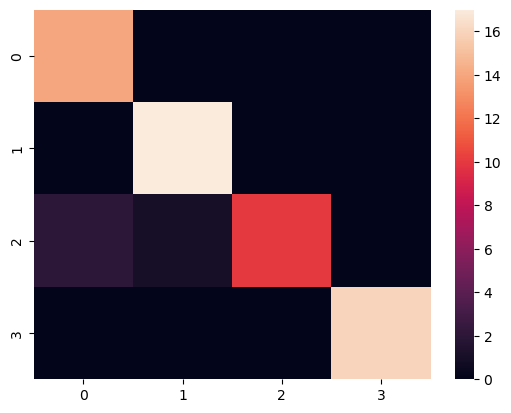

In [81]:
sns.heatmap(confusion1)

In [82]:
#as our class has 4 types d,h,o,s we got 4x4 confusion matrix
a = accuracy_score(y_test, y_pred)
accu.append(a*100)
print("accuracy:",a)

accuracy: 0.95


In [83]:
print("accuracy:",a)
print("precision Score:",precision_score(y_test,y_pred,average="weighted"))
print("Recall score:",recall_score(y_test,y_pred,average="weighted"))

accuracy: 0.95
precision Score: 0.9550925925925926
Recall score: 0.95


# DECISION TREE CLASSIFIER

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [85]:
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(y_pred2)

[1 3 2 1 0 3 1 1 2 1 1 2 0 3 3 1 0 3 1 0 1 3 2 1 0 2 1 3 1 0 3 1 3 2 0 2 0
 1 3 1 2 2 0 2 3 2 3 3 0 0 0 1 2 2 3 0 1 3 0 3]


In [86]:
confusion2=confusion_matrix(y_test, y_pred2)
print(confusion2)

[[14  0  0  0]
 [ 0 16  0  1]
 [ 0  0 13  0]
 [ 0  1  0 15]]


<AxesSubplot:>

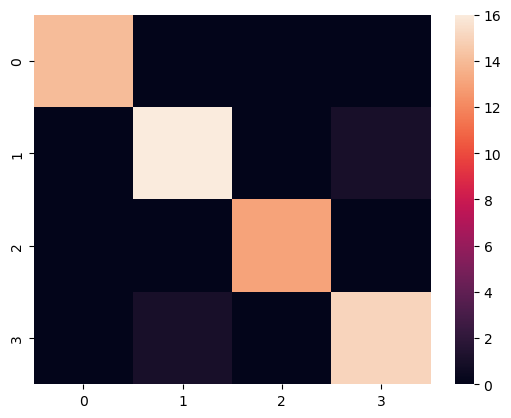

In [87]:
sns.heatmap(confusion2)

In [88]:
b=accuracy_score(y_test, y_pred2)
print(b*100)

96.66666666666667


In [89]:
accu.append(b*100)

# RANDOM FOREST CLASSIFIER

In [90]:
model3=RandomForestClassifier(max_depth=6)
model3.fit(x_train,y_train)

RandomForestClassifier(max_depth=6)

In [91]:
y_pred3 = model3.predict(x_test)
print(y_pred3)

[1 3 2 1 0 3 1 1 2 1 3 2 0 3 3 1 0 3 1 0 1 3 2 1 0 2 1 3 1 0 3 1 3 2 0 0 0
 1 3 1 2 2 0 2 3 2 3 3 0 0 0 1 2 2 3 0 1 3 0 3]


In [92]:
confusion3=confusion_matrix(y_test, y_pred2)
print(confusion3)

[[14  0  0  0]
 [ 0 16  0  1]
 [ 0  0 13  0]
 [ 0  1  0 15]]


<AxesSubplot:>

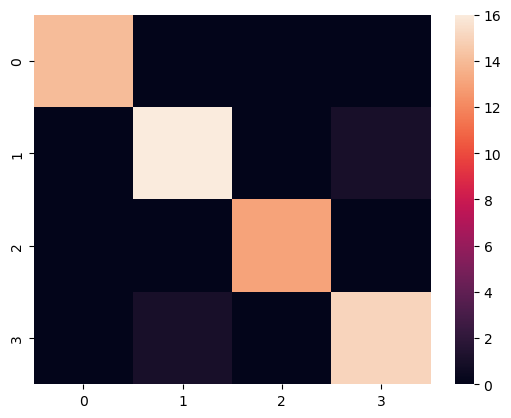

In [93]:
sns.heatmap(confusion3)

In [94]:
c=accuracy_score(y_test, y_pred3)
print(c*100)

96.66666666666667


In [95]:
accu.append(c*100)

# GRADIENT BOOSTING CLASSIFIER

In [96]:
model4 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
print(y_pred4)

[1 3 2 1 0 3 3 1 2 1 3 2 0 3 3 3 0 3 1 0 1 3 2 1 0 2 1 3 1 0 3 1 3 2 0 2 0
 1 3 1 2 2 0 2 3 2 3 3 0 0 0 1 2 2 3 0 1 3 0 3]


In [97]:
confusion4=confusion_matrix(y_test, y_pred2)
print(confusion4)

[[14  0  0  0]
 [ 0 16  0  1]
 [ 0  0 13  0]
 [ 0  1  0 15]]


<AxesSubplot:>

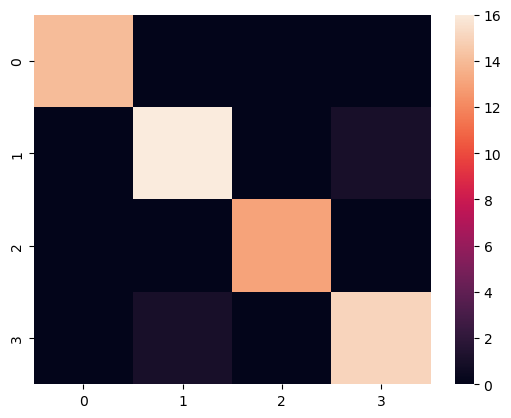

In [98]:
sns.heatmap(confusion4)

In [99]:
d=accuracy_score(y_test, y_pred4)
print(d*100)
accu.append(d*100)

95.0


In [114]:
print(accu)

[95.0, 96.66666666666667, 96.66666666666667, 95.0]


# COMPARISON OF ALGORITHMS

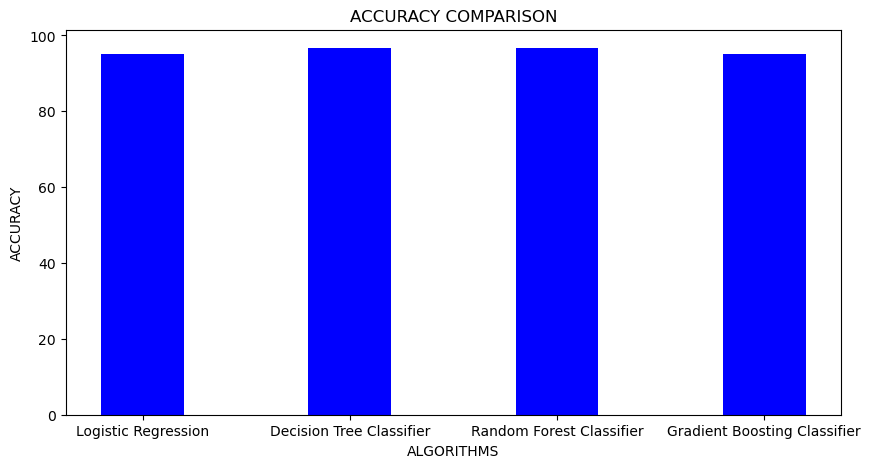

In [113]:
import numpy as np
import matplotlib.pyplot as plt
 
models = ["Logistic Regression","Decision Tree Classifier","Random Forest Classifier","Gradient Boosting Classifier"]
fig = plt.figure(figsize = (10, 5))
 
plt.bar(models, accu, color ='blue',width=0.4)
 
plt.xlabel("ALGORITHMS")
plt.ylabel("ACCURACY")
plt.title("ACCURACY COMPARISON")
plt.show()

In [115]:
print(accu)

[95.0, 96.66666666666667, 96.66666666666667, 95.0]


# Here we have got highest Accuracy with Decision Tree and Random Forest Classifier
## Let's go with Random Forest Classifer
### Let's download the pickle file from here

In [117]:
import pickle
pkl_filename = 'RandomForestClassifier.pkl'
pkl = open(pkl_filename,'wb')
pickle.dump(model3,pkl)
pkl.close()

In [ ]:
# from above arry i  got the labels so

# d=0 , h=1 , o=2 ,s =3
# d=mixed deciduous forest
# h= hinoki forest
# o=other
# s=sugi forest

In [122]:
data = np.array([[53,25,49,99,51,93,84,26,58,63.2,26.7,49.28,3.25,-24.89,-30.38,-3.6,4.15,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.1,-7.07
]])
pred = model3.predict(data)
print(pred)

[3]
